In [1]:
import pickle
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
FILE_NAME = "data_2022-08-06_13-14-52.pkl"

In [3]:
def read_file(file_path: str):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data
    

In [4]:
data = read_file("test_data/" + FILE_NAME)

In [5]:
def transform_data_to_df(data):
    data_transformed = {ts: pd.Series({str(idx): value for idx, value in np.ndenumerate(value_matrix)}) for ts, value_matrix in data.items()}
    df = pd.DataFrame.from_dict(data_transformed, orient='index')
    df = df.melt(ignore_index=False, var_name='matrix_idx')
    df.index.name = 'ts'
    df.reset_index(inplace= True)
    return df

df = transform_data_to_df(data)
df

,ts,matrix_idx,value
0,2022-08-06 13:11:26.609848,"(0, 0)",0.0
1,2022-08-06 13:11:26.621032,"(0, 0)",355.0
2,2022-08-06 13:11:26.630069,"(0, 0)",355.0
3,2022-08-06 13:11:26.636882,"(0, 0)",355.0
4,2022-08-06 13:11:26.644963,"(0, 0)",355.0
...,...,...,...
23995,2022-08-06 13:14:51.649800,"(3, 5)",0.0
23996,2022-08-06 13:14:51.660785,"(3, 5)",0.0
23997,2022-08-06 13:14:51.668996,"(3, 5)",0.0
23998,2022-08-06 13:14:52.689832,"(3, 5)",0.0


<AxesSubplot:xlabel='ts', ylabel='value'>

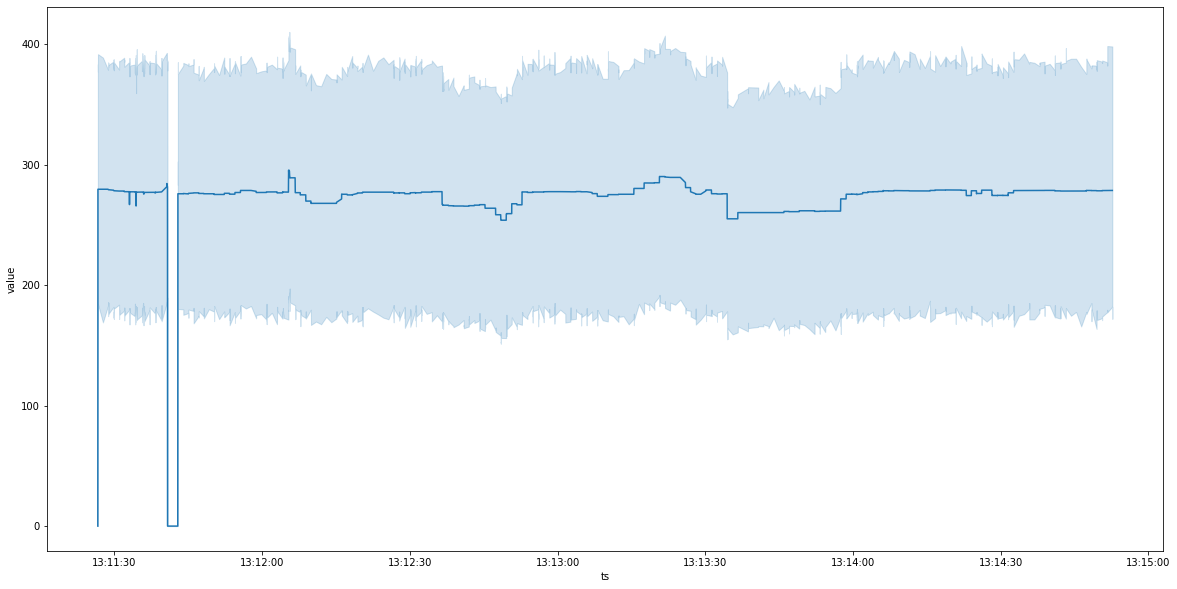

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(ax=ax, data=df, x='ts', y='value')

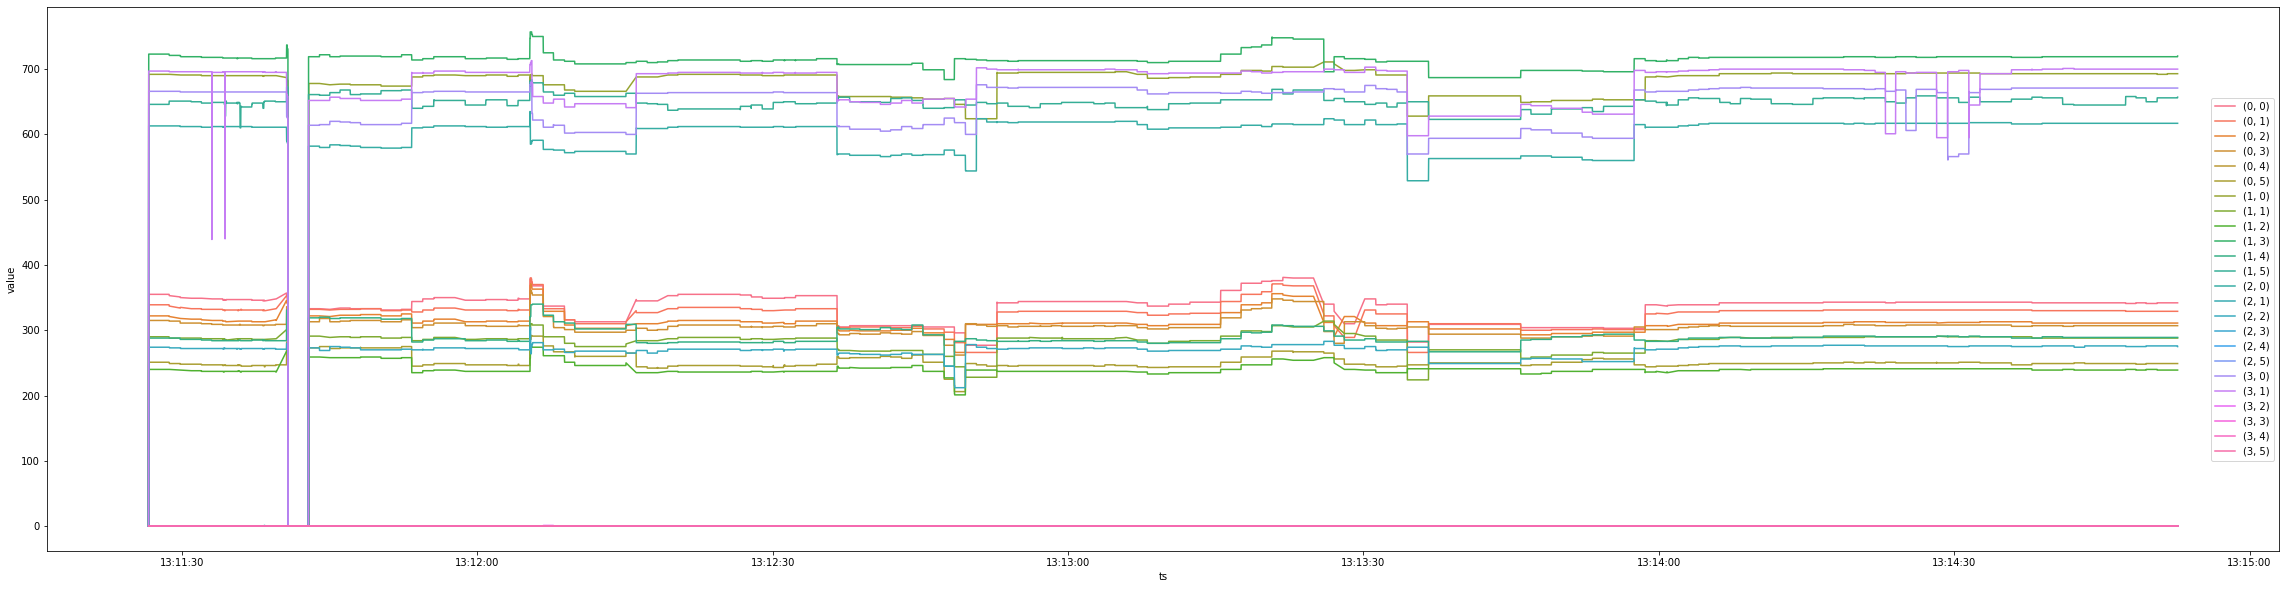

In [7]:
def plot_without_markers(df):
    fig, ax = plt.subplots(figsize=(40, 10))
    sns.lineplot(ax=ax, data=df, x='ts', y='value', hue='matrix_idx')
    plt.legend(loc="center right")

plot_without_markers(df)

In [8]:
CREATE_MARKERS = False

In [9]:
def create_shadow_marker():
    marker = {}
    sub_markers = ['start_shadow', 'end_shadow']
    for sub_marker in sub_markers:
        print(f"Press key for '{sub_marker}'")
        input()  # just wait for any keypress
        marker[sub_marker] = datetime.now()
    return marker

In [10]:
if CREATE_MARKERS:
    markers = []

In [11]:
if CREATE_MARKERS:
    markers.append(create_shadow_marker())

In [12]:
# markers

In [13]:
def plot_with_shadow_markers(df, markers):
    color_map = {'start_shadow': 'orange', 'end_shadow': 'blue'}

    fig, ax = plt.subplots(figsize=(40, 10))
    for marker in markers:
        for sub_marker, ts in marker.items():
            ax.axvline(ts, color=color_map[sub_marker])
    sns.lineplot(ax=ax, data=df, x='ts', y='value', hue='matrix_idx')
    plt.legend(loc="center right")

In [14]:
# plot_with_shadow_markers(df, markers)

In [15]:
import sys
sys.path.append('..')
from data_preprocessor import MatrixDataPreprocessor
from utils import load_config

In [16]:
datpro = MatrixDataPreprocessor(load_config('../config.yml'))

In [17]:
matrix_start = (0,0)
# matrix_end = (2,2)
matrix_end = (4,6)

data_sliced = {ts: value_matrix[matrix_start[0]:matrix_end[0], matrix_start[1]:matrix_end[1]] for ts, value_matrix in data.items()}
datpro.matrix_shape = (matrix_end[0] - matrix_start[0], matrix_end[1] - matrix_start[1])

# this is bullshit
# datpro.cluster_predictors = datpro.cluster_predictors[:datpro.matrix_shape[0] * datpro.matrix_shape[1]]

print(datpro.matrix_shape)
list(data_sliced.values())[0]

(4, 6)


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [18]:
datpro.calibrate(values=list(data_sliced.values()))


df_normalized = transform_data_to_df({ts: datpro.normalize(value_matrix) for ts, value_matrix in data_sliced.items()})

Calibrating...
Calibration done!
Calibrating...
Calibration done!
Calibrating...
Calibration done!
Calibrating...
Calibration done!
Calibrating...
Calibration done!
Calibrating...
Calibration done!
Calibrating...
Calibration done!
Calibrating...
Calibration done!
Calibrating...
Calibration done!
Calibrating...
Calibration done!
Calibrating...
Calibration done!


In [19]:
df_normalized

,ts,matrix_idx,value
0,2022-08-06 13:11:26.609848,"(0, 0)",1.0
1,2022-08-06 13:11:26.621032,"(0, 0)",1.0
2,2022-08-06 13:11:26.630069,"(0, 0)",1.0
3,2022-08-06 13:11:26.636882,"(0, 0)",1.0
4,2022-08-06 13:11:26.644963,"(0, 0)",1.0
...,...,...,...
23995,2022-08-06 13:14:51.649800,"(3, 5)",-1.0
23996,2022-08-06 13:14:51.660785,"(3, 5)",-1.0
23997,2022-08-06 13:14:51.668996,"(3, 5)",-1.0
23998,2022-08-06 13:14:52.689832,"(3, 5)",-1.0


<AxesSubplot:>

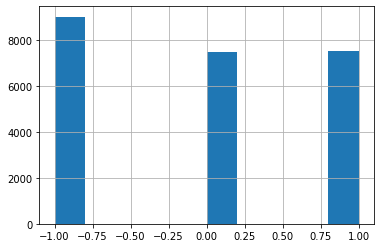

In [20]:
df_normalized.value.hist()

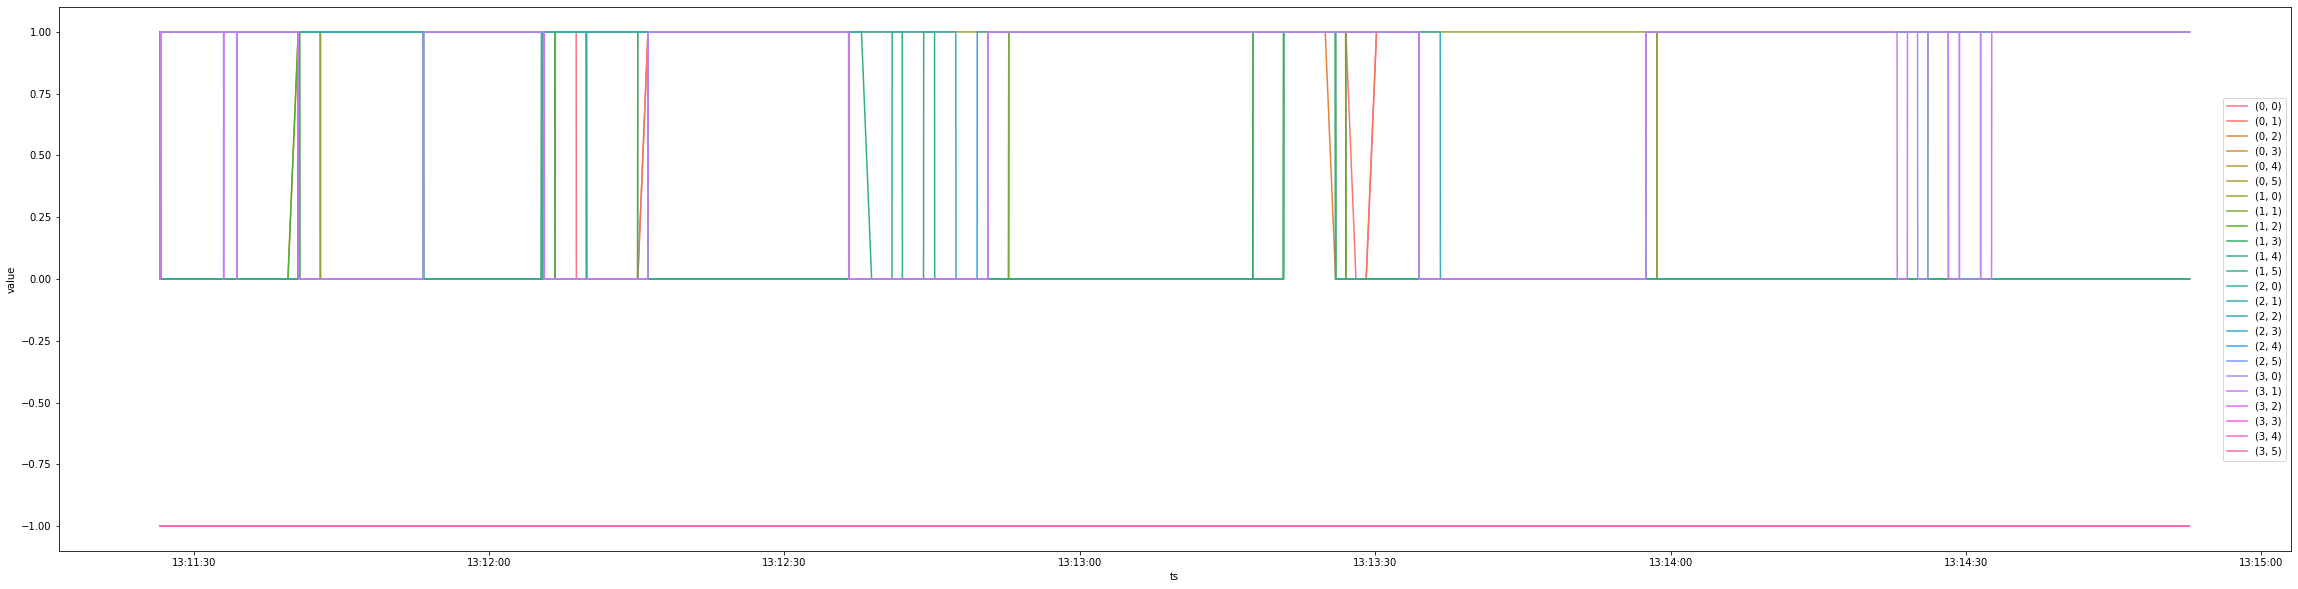

In [21]:
plot_without_markers(df_normalized)


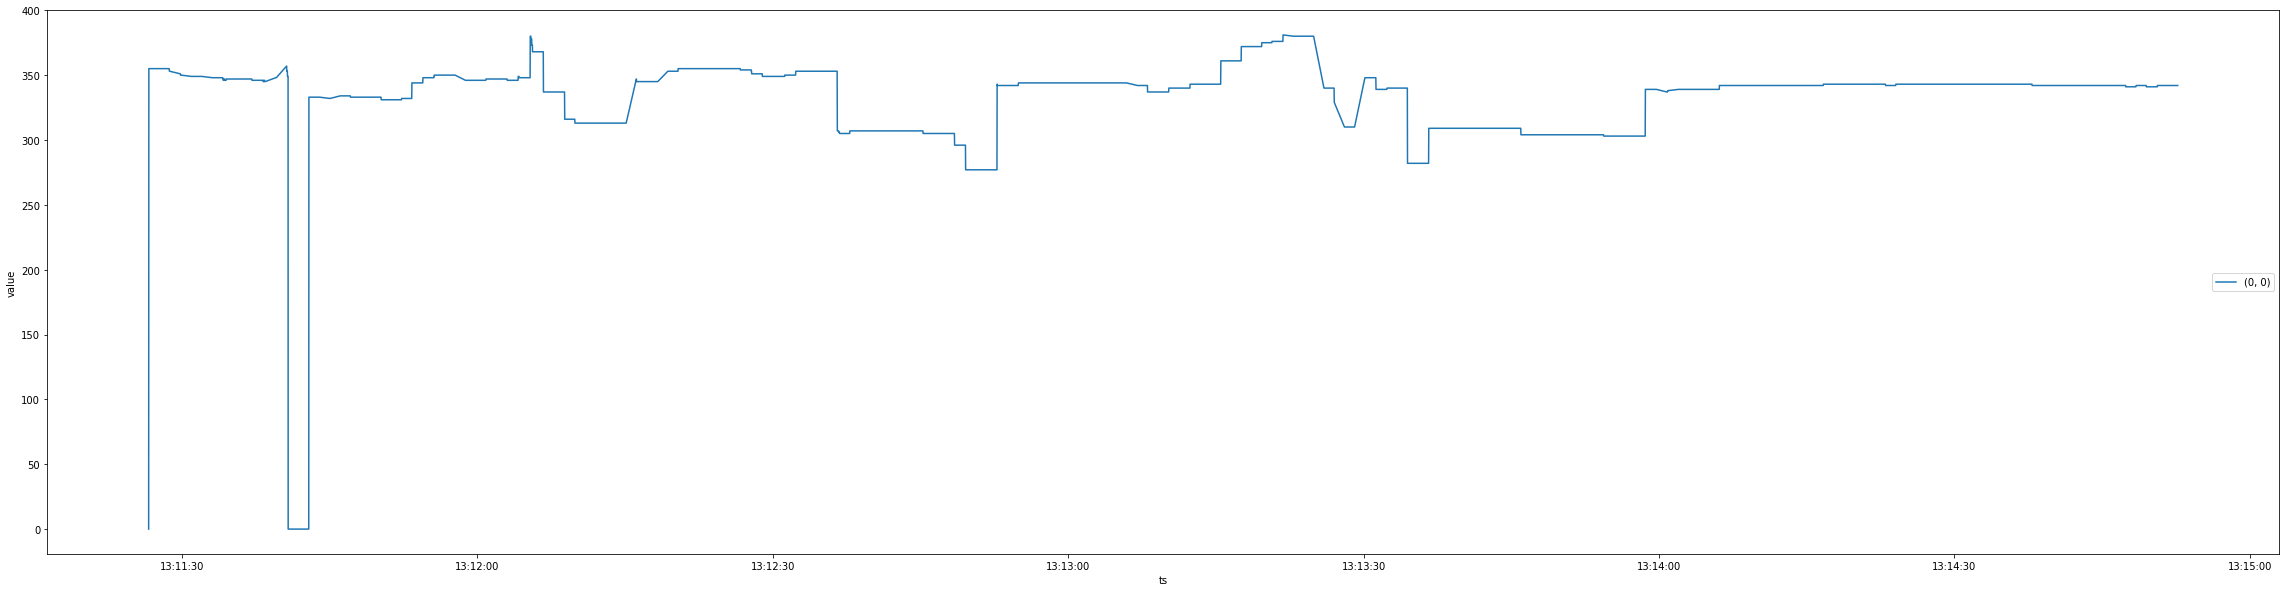

In [22]:
plot_without_markers(df[df['matrix_idx'] == '(0, 0)'])

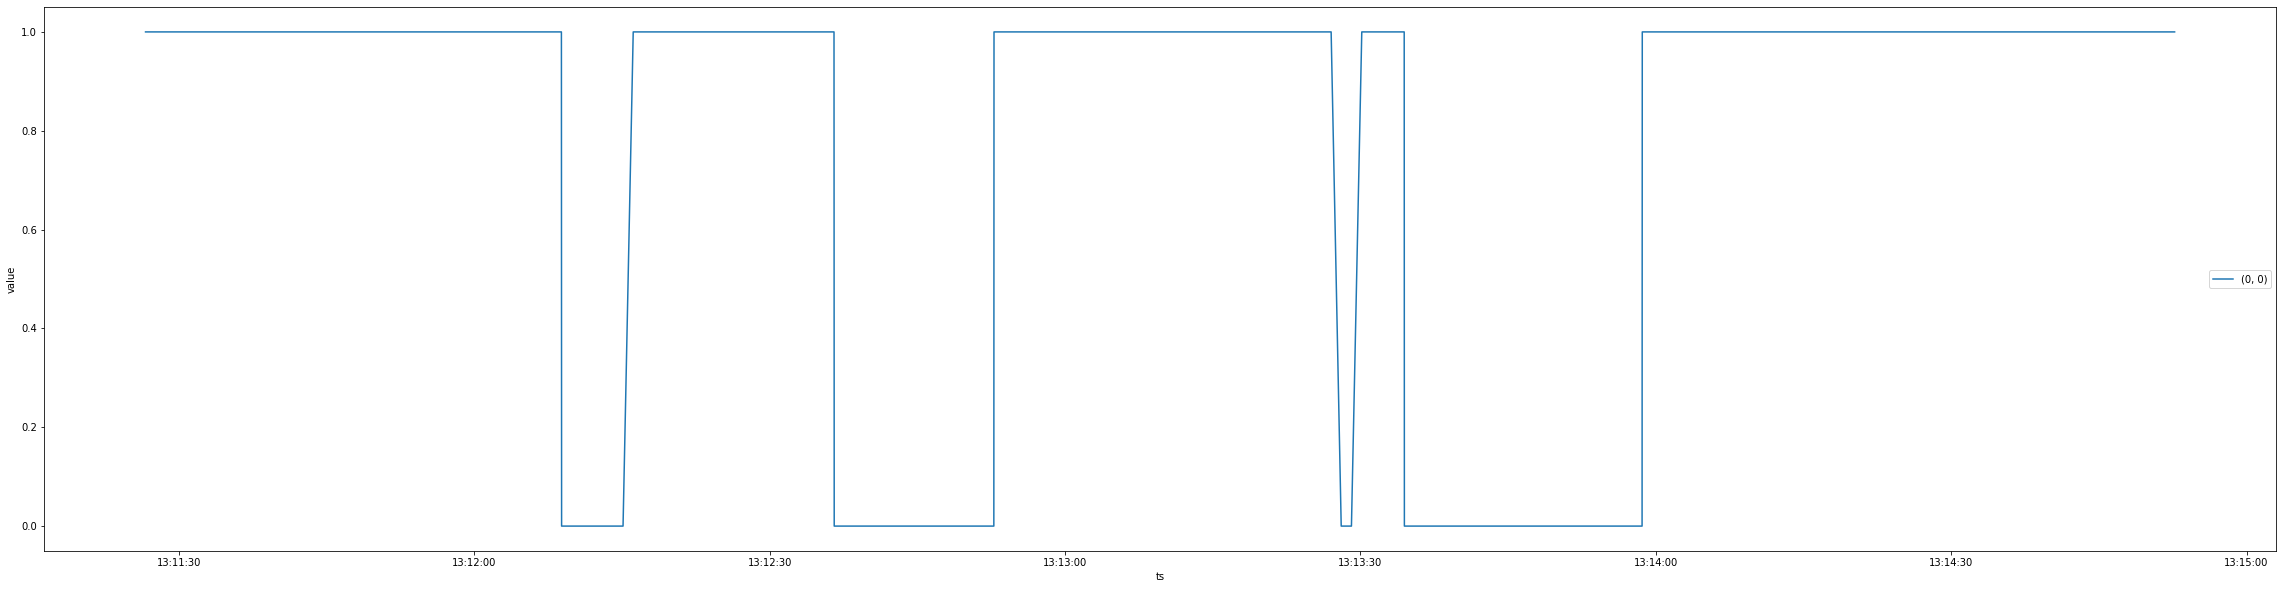

In [23]:
plot_without_markers(df_normalized[df_normalized['matrix_idx'] == '(0, 0)'])

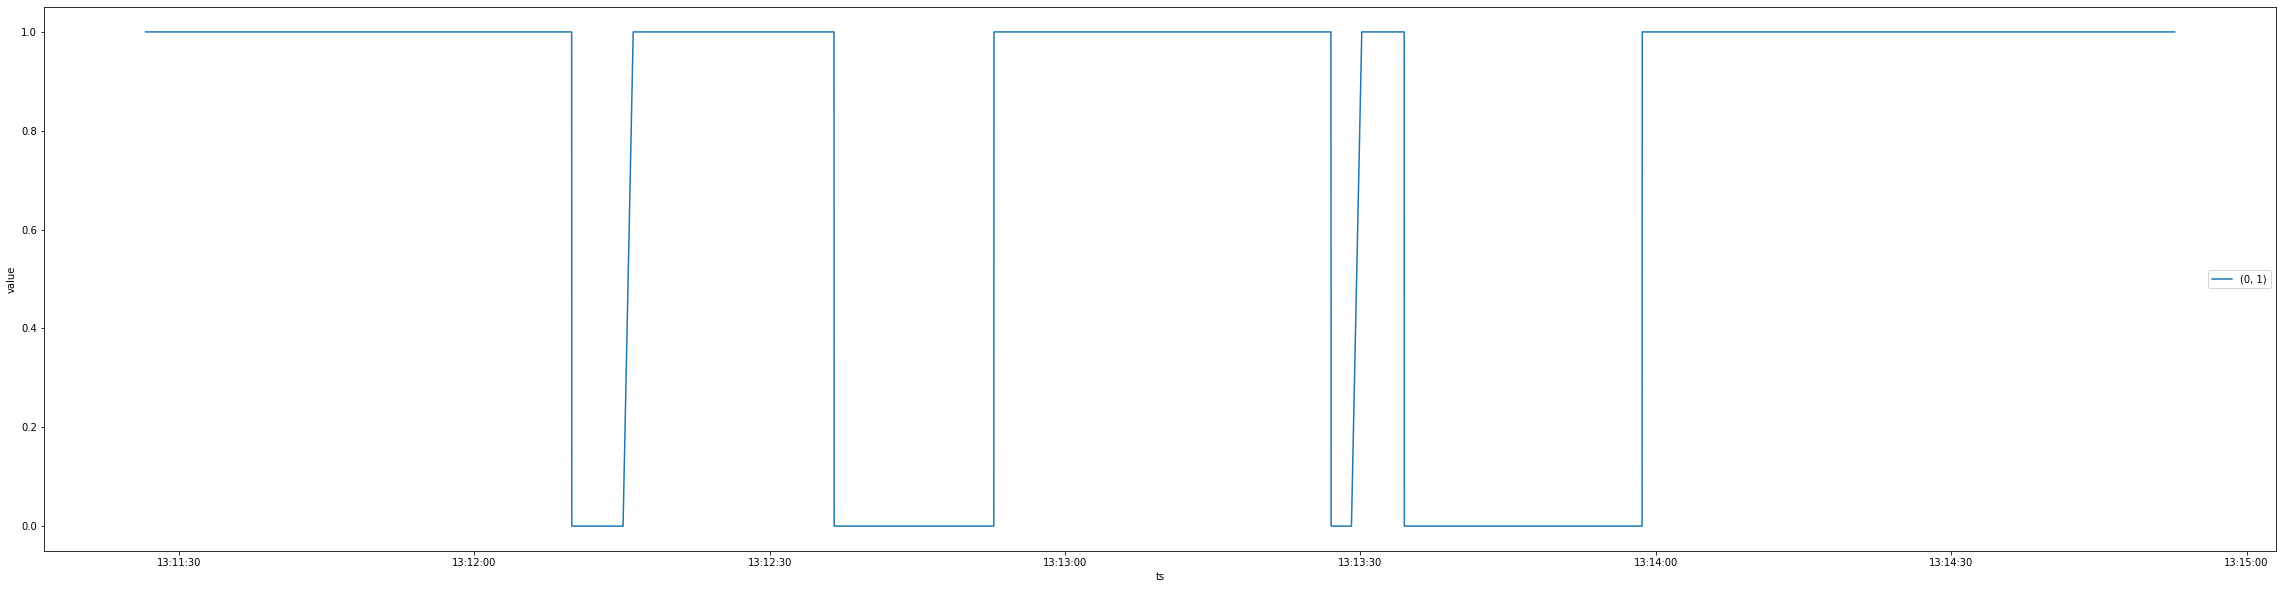

In [24]:
plot_without_markers(df_normalized[df_normalized['matrix_idx'] == '(0, 1)'])

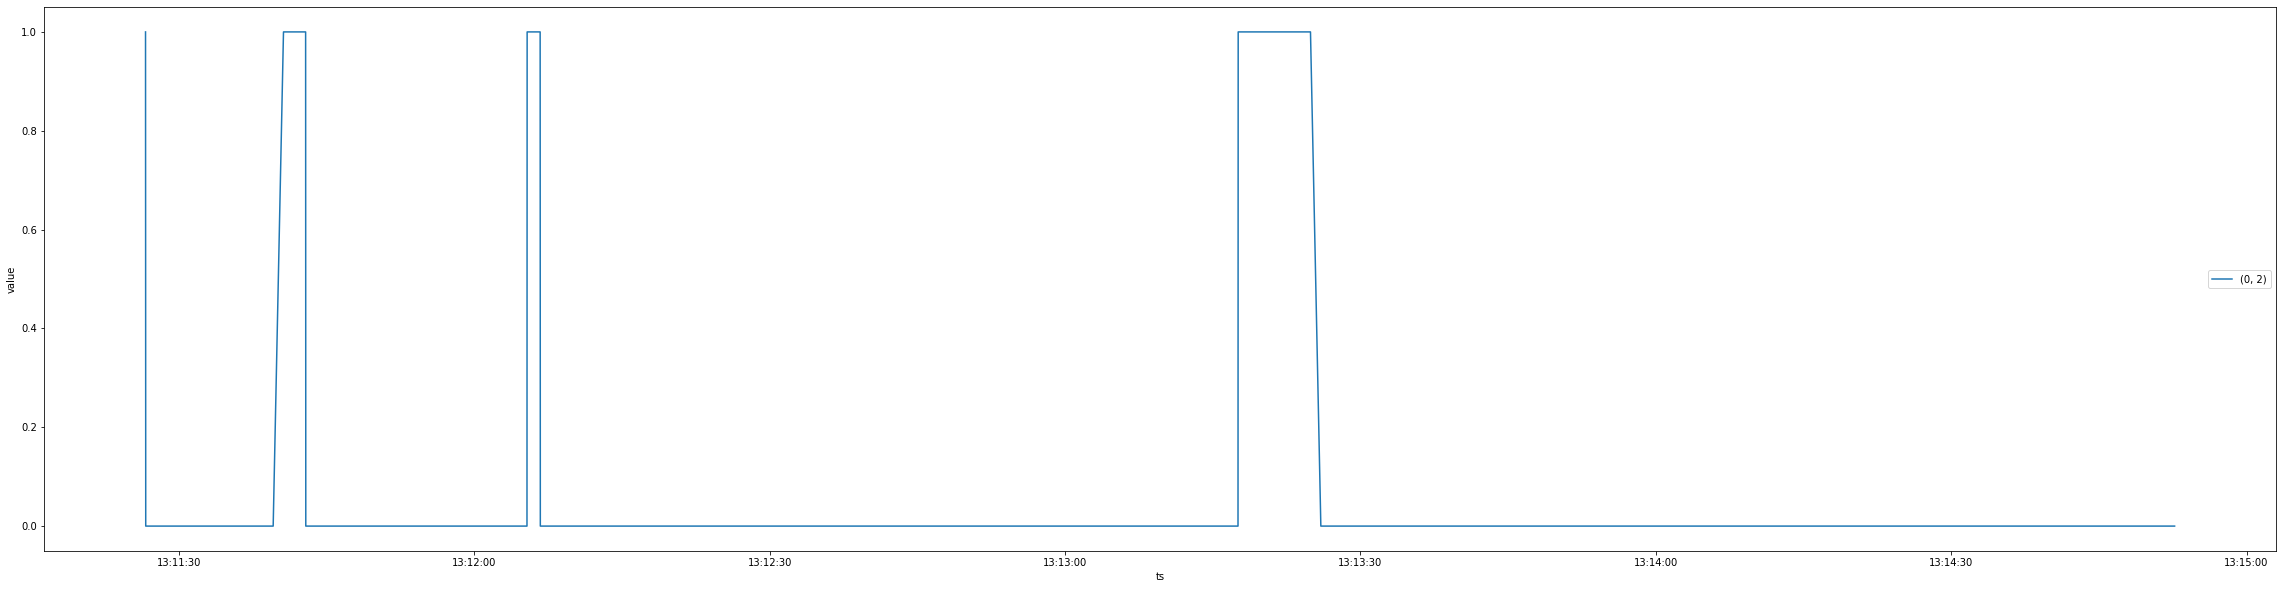

In [25]:
plot_without_markers(df_normalized[df_normalized['matrix_idx'] == '(0, 2)'])

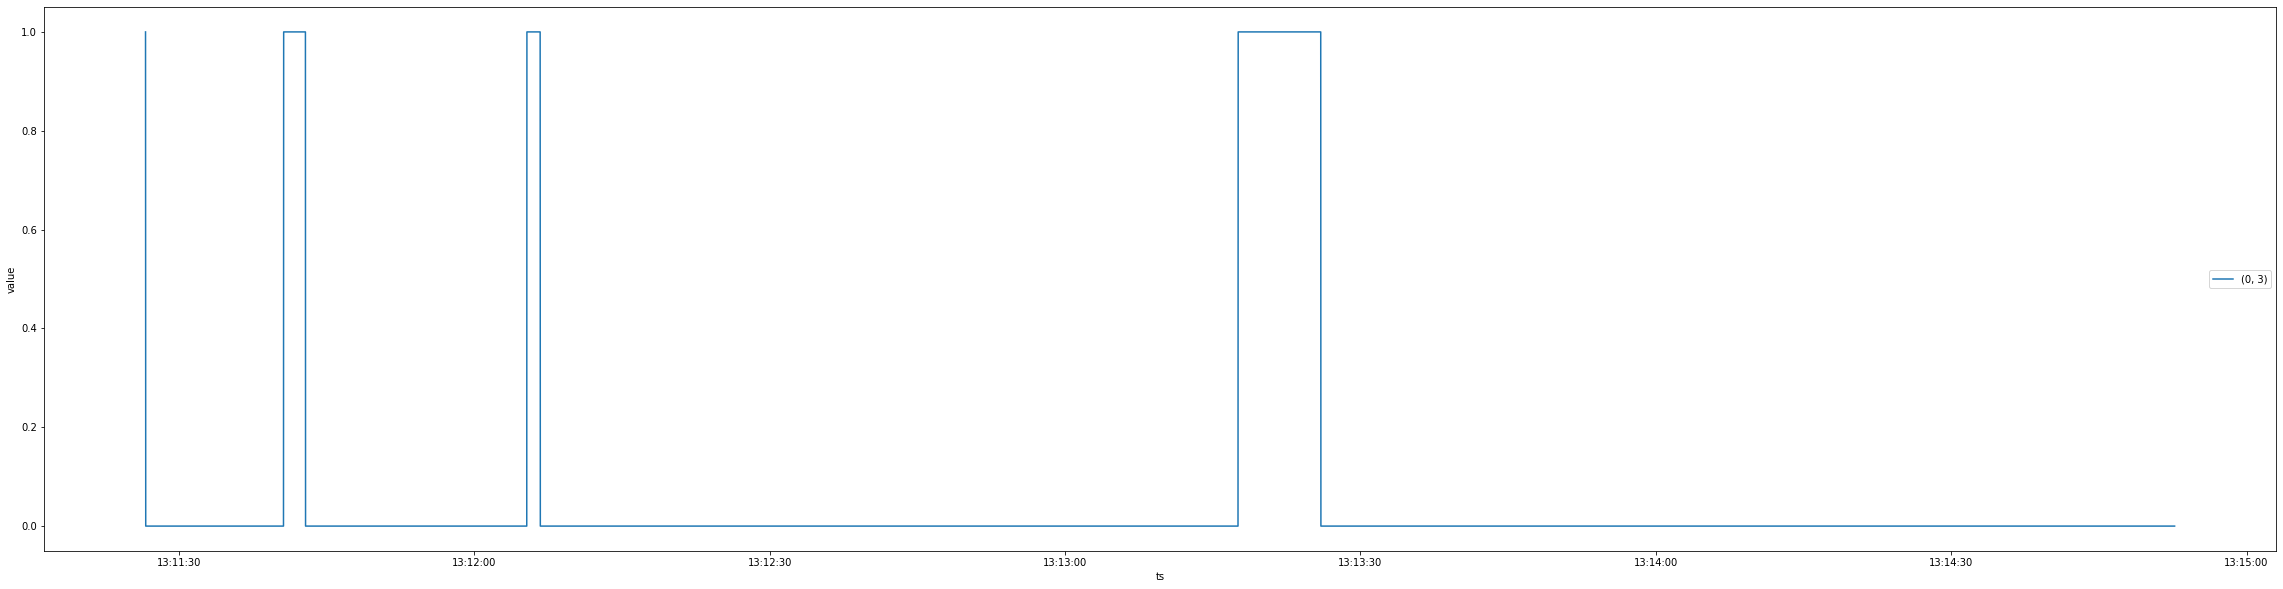

In [26]:
plot_without_markers(df_normalized[df_normalized['matrix_idx'] == '(0, 3)'])

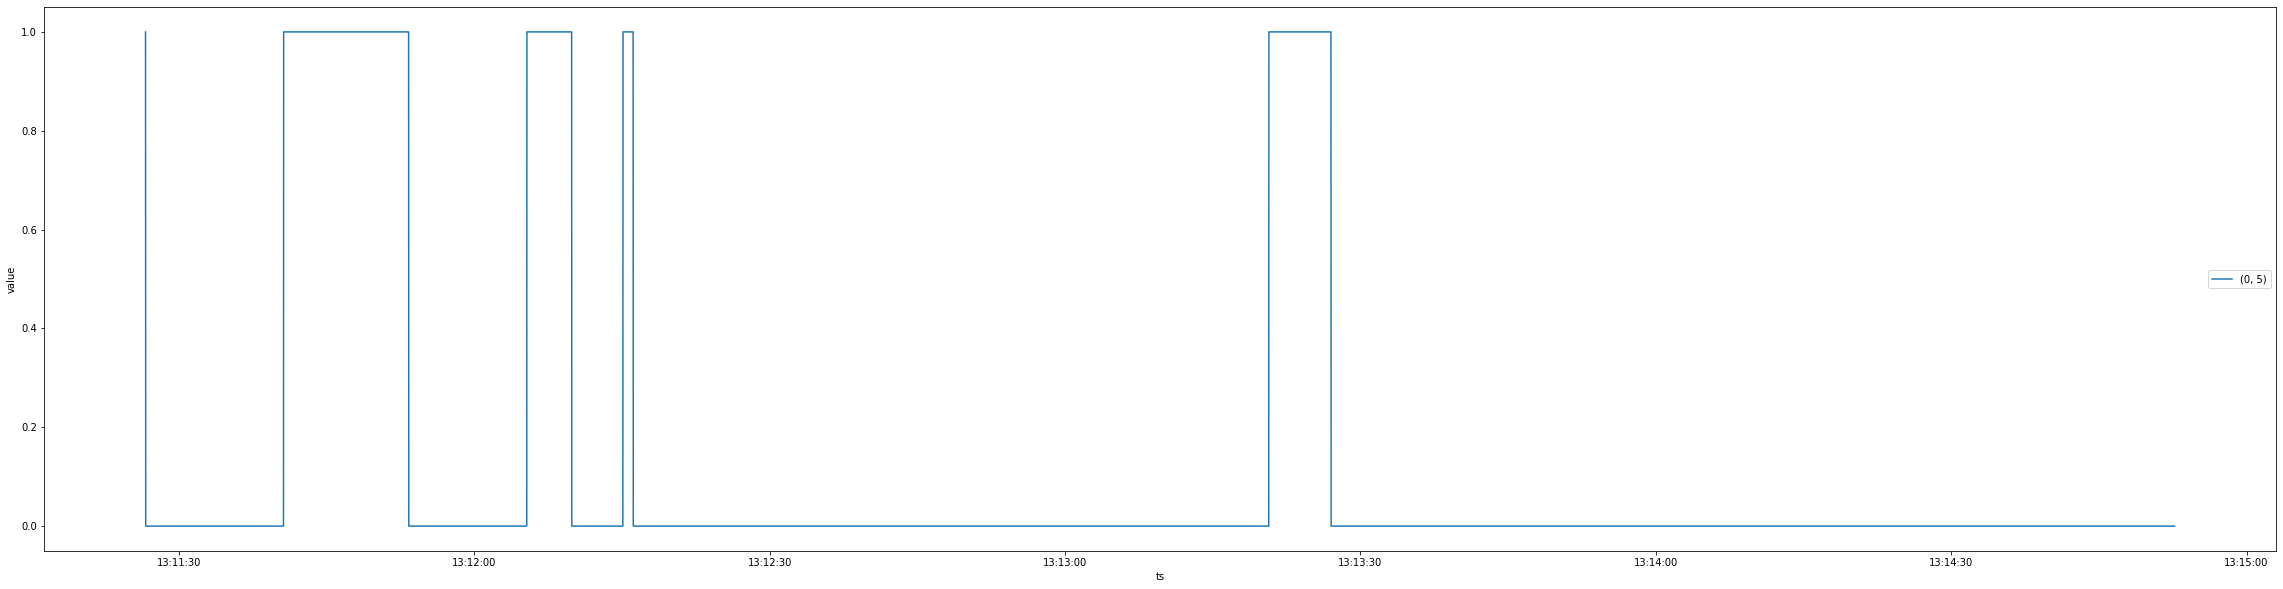

In [27]:
plot_without_markers(df_normalized[df_normalized['matrix_idx'] == '(0, 5)'])

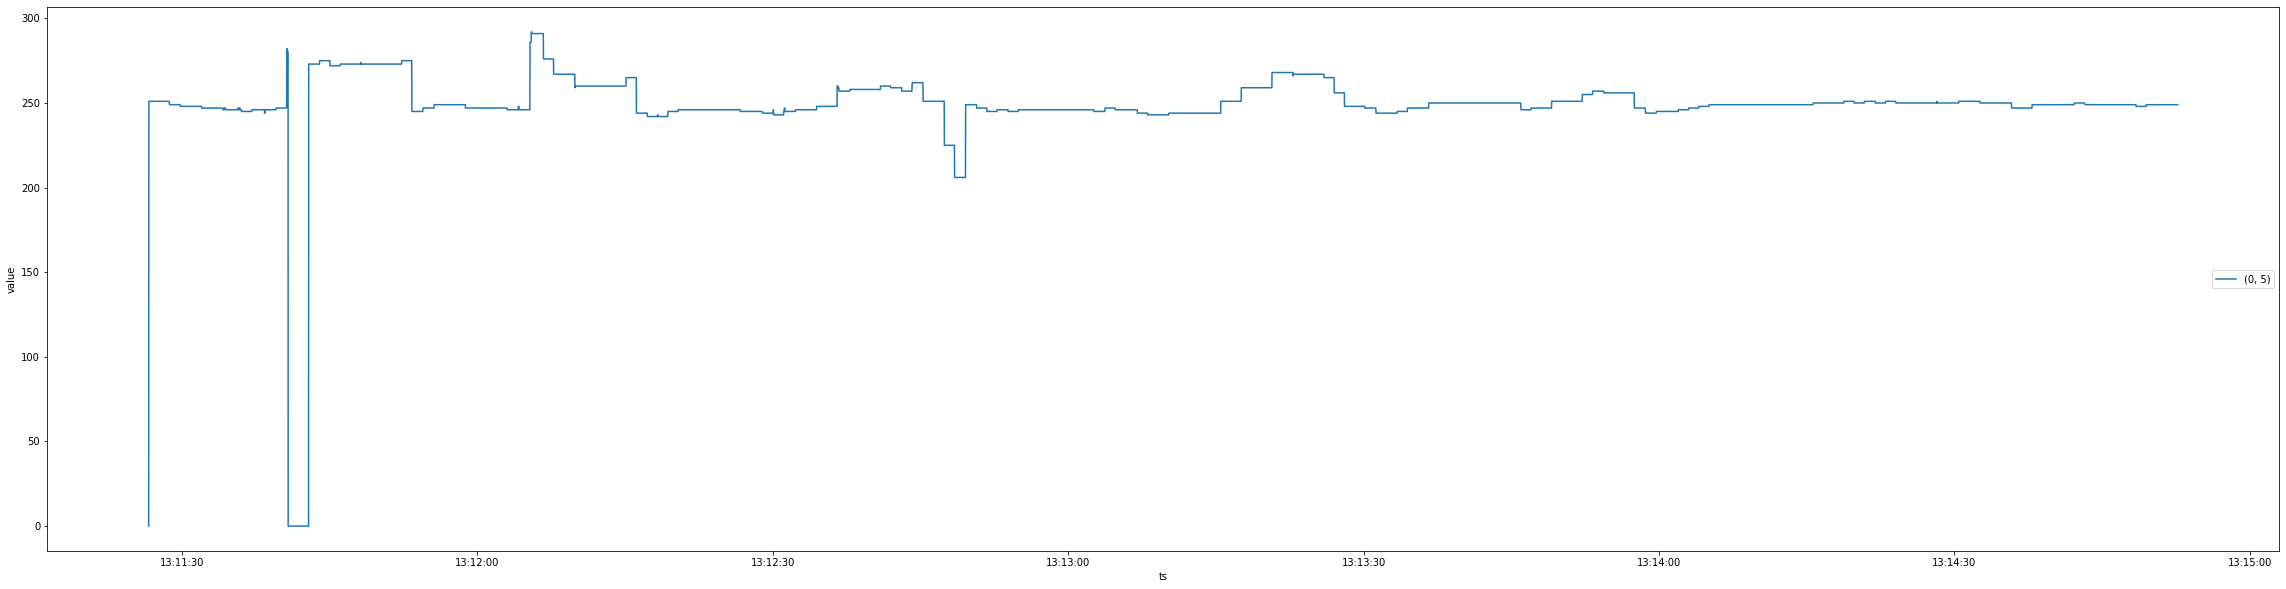

In [28]:
plot_without_markers(df[df['matrix_idx'] == '(0, 5)'])

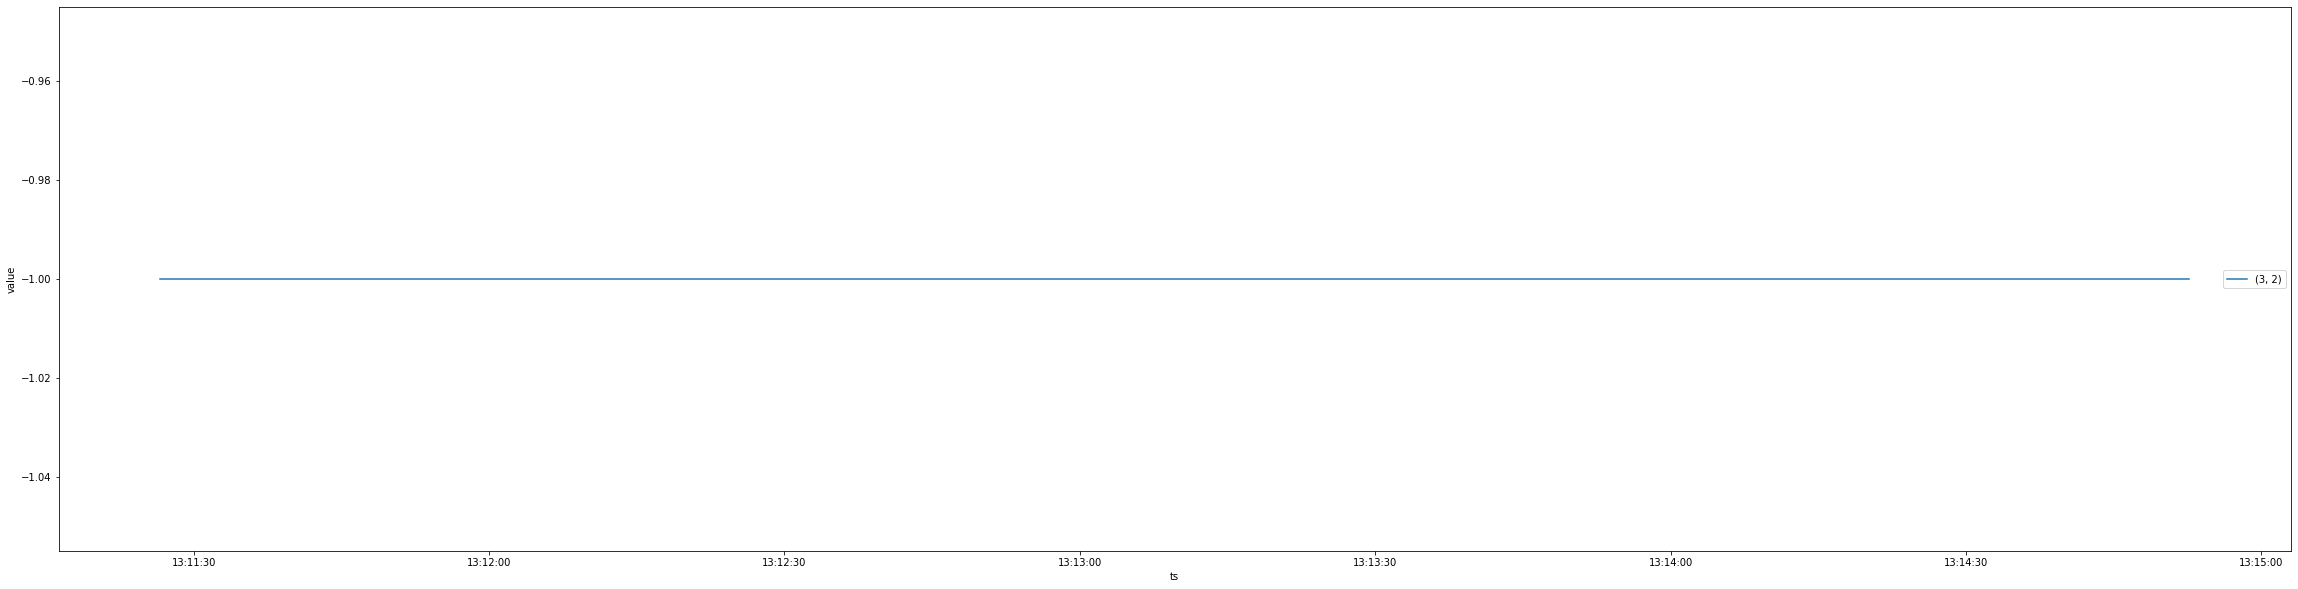

In [29]:
plot_without_markers(df_normalized[df_normalized['matrix_idx'] == '(3, 2)'])

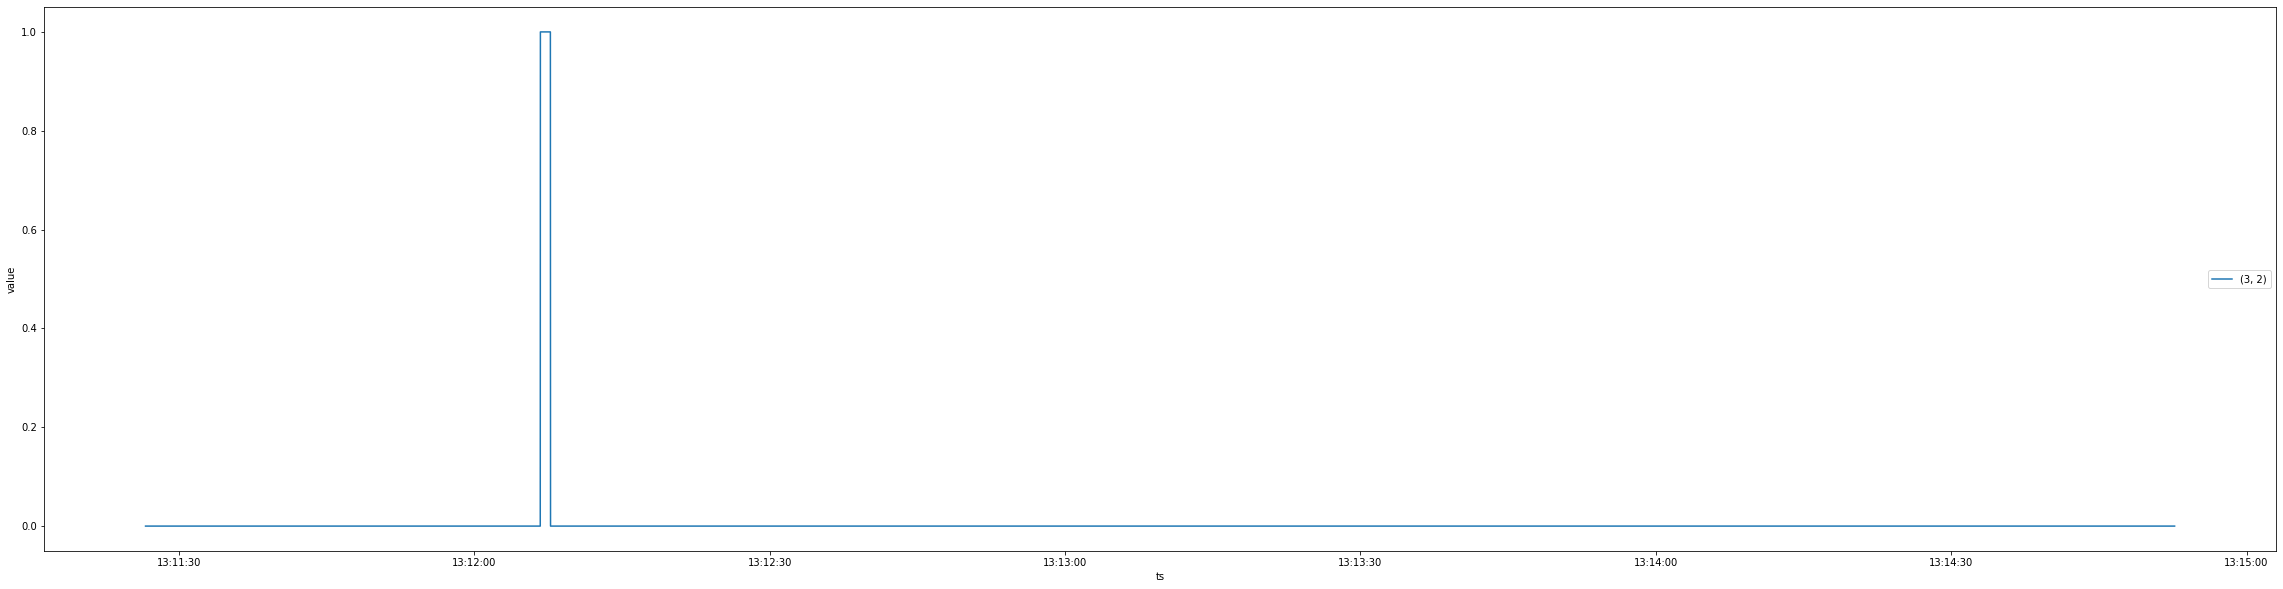

In [30]:
plot_without_markers(df[df['matrix_idx'] == '(3, 2)'])

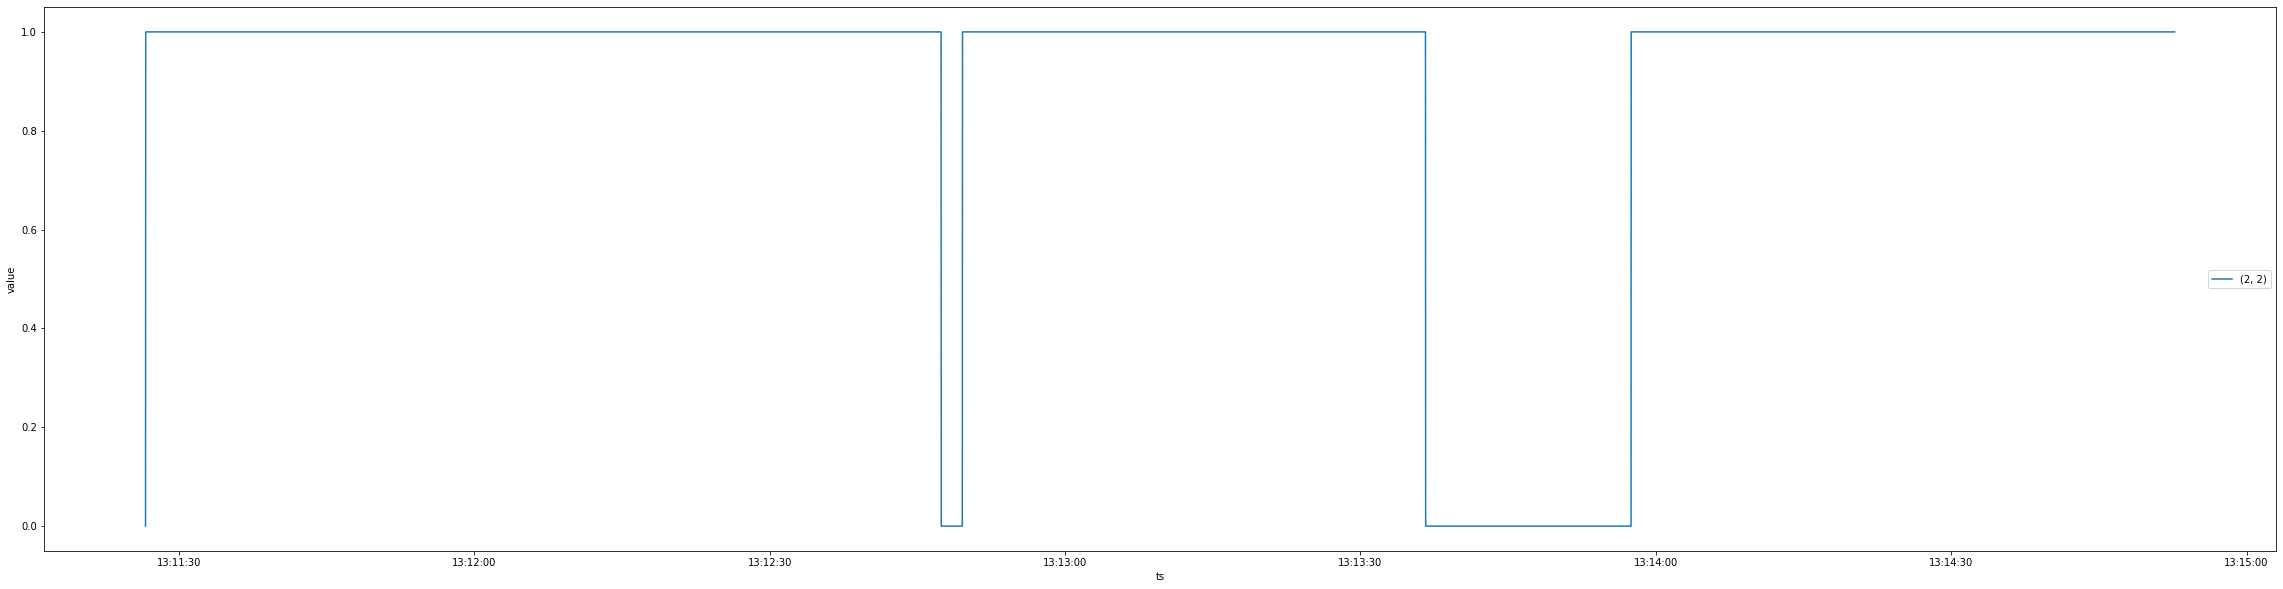

In [31]:
plot_without_markers(df_normalized[df_normalized['matrix_idx'] == '(2, 2)'])

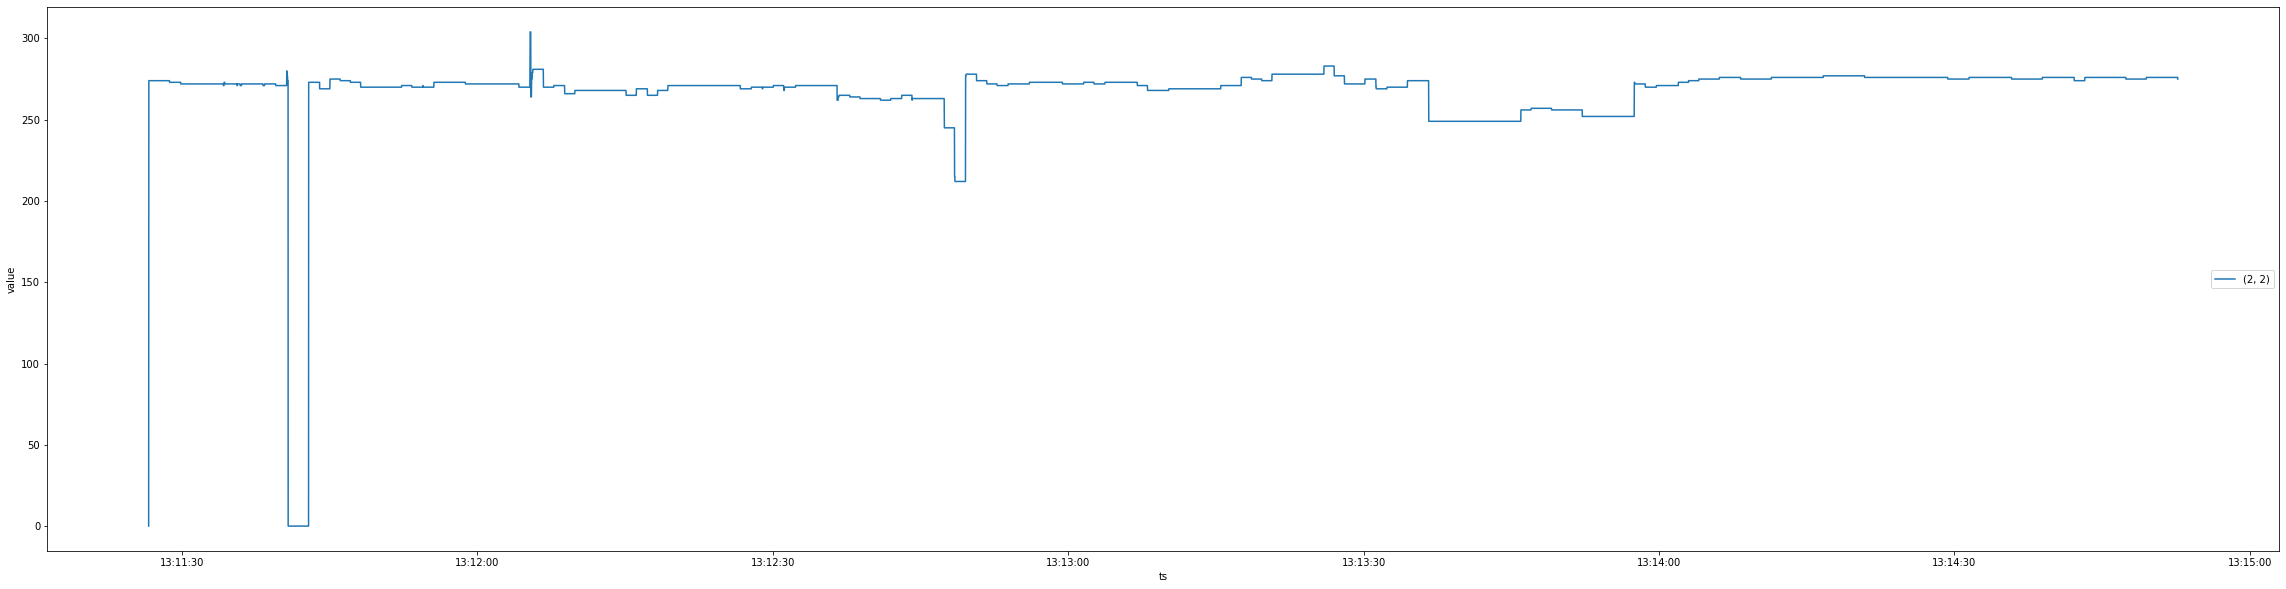

In [32]:
plot_without_markers(df[df['matrix_idx'] == '(2, 2)'])

In [33]:
test_matrix = list(data.values())[496]

print(test_matrix)

print(datpro.normalize(test_matrix))

[[305. 304. 299. 293.   0. 257.]
 [658. 269. 242. 707. 302. 657.]
 [570.   0. 265.   0.   0.   0.]
 [612. 653.   0.   0.   0.   0.]]
[[ 0.  0.  0.  0. -1.  0.]
 [ 1.  0.  0.  0.  1.  0.]
 [ 0. -1.  1. -1. -1. -1.]
 [ 0.  0. -1. -1. -1. -1.]]


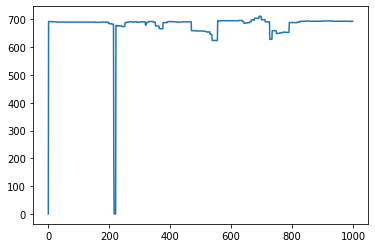

In [34]:
test_sensor = np.stack(list(data.values()), axis=2)[1, 0, :]

plt.plot(test_sensor)

In [35]:
any(x != 0.0 for x in list(df_normalized['value']))

True

In [36]:
[pred.cluster_centers_ for pred in datpro.cluster_predictors if hasattr(pred, "cluster_centers_")]

[array([[301.81437126],
        [347.26481959]]),
 array([[297.06024096],
        [333.83912484]]),
 array([[354.87012987],
        [310.46709007]]),
 array([[346.2375   ],
        [304.8539261]]),
 array([[277.28571429],
        [247.72682927]]),
 array([[683.97983015],
        [170.        ]]),
 array([[258.43333333],
        [289.00504414]]),
 array([[262.80508475],
        [237.90545455]]),
 array([[745.72151899],
        [713.83737024]]),
 array([[315.97790055],
        [284.89281046]]),
 array([[647.23221884],
        [670.00404858]]),
 array([[614.10541311],
        [571.22540984]]),
 array([[272.29077615],
        [247.77192982]]),
 array([[667.28973277],
        [608.04255319]]),
 array([[696.87430168],
        [641.06086957]])]